# Plot results of Seurat v3 merge with developmental hb and two adult hb datasets
The merged dataset is exported to .h5ad format, for the sole use of making tSNE plots in scanpy format.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.sparse import csr_matrix

#settings
sc.settings.verbosity = 3
sc.logging.print_versions()
scv.logging.print_versions()
sc.settings.figdir = "../../figures/merge_adult/"
sc.settings.set_figure_params(dpi=80)

C:\Users\Juliska\Anaconda3\envs\UMCU\lib\site-packages\anndata\_core\anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1
scvelo==0.1.25  scanpy==1.4.6  anndata==0.7.1  loompy==2.0.17  numpy==1.18.1  scipy==1.4.1  matplotlib==3.2.1  sklearn==0.22.1  pandas==1.0.1  

In [2]:
adata = sc.read_h5ad('../../data/output/merge_adult/Merged4TSNE.h5ad')
adata

AnnData object with n_obs × n_vars = 12110 × 1841 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nFeature', 'nCount', 'n_total_counts', 'n_counts_norm', 'plate', 'stage', 'ERCC_genes', 'percent_mito', 'percent_ribo', 'louvain', 'stim', 'percent.mito', 'nCount_integrated', 'nFeature_integrated', 'integrated_snn_res.0.8', 'celltype', 'clusters', 'orig.celltype', 'seurat_clusters', 'cartpt.expr'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

In [3]:
pc_cells = ['Habenula_012___E11_1__X011','Habenula_012___E11_1__X021','Habenula_012___E11_1__X059','Habenula_012___E11_1__X081','Habenula_012___E11_1__X139',
 'Habenula_012___E11_1__X242', 'Habenula_012___E11_1__X248', 'Habenula_012___E11_1__X255', 'Habenula_012___E11_1__X267', 'Habenula_012___E11_1__X284',
 'Habenula_012___E11_1__X308', 'Habenula_012___E11_1__X327', 'Habenula_012___E11_1__X328', 'Habenula_012___E11_1__X332', 'Habenula_012___E11_1__X335',
 'Habenula_012___E11_1__X370', 'Habenula_012___E11_1__X372', 'Habenula_013___E11_2__X054', 'Habenula_013___E11_2__X355', 'Habenula_022___E12_1__X034',
 'Habenula_022___E12_1__X069', 'Habenula_022___E12_1__X177', 'Habenula_022___E12_1__X195', 'Habenula_022___E12_1__X203', 'Habenula_022___E12_1__X212',
 'Habenula_022___E12_1__X288', 'Habenula_022___E12_1__X327', 'Habenula_022___E12_1__X343', 'Habenula_022___E12_1__X353', 'Habenula_006___E13_1__X062',
 'Habenula_006___E13_1__X268', 'Habenula_006___E13_1__X307', 'Habenula_006___E13_1__X321', 'Habenula_008___E13_2__X027', 'Habenula_008___E13_2__X028',
 'Habenula_008___E13_2__X044', 'Habenula_008___E13_2__X077', 'Habenula_008___E13_2__X090', 'Habenula_008___E13_2__X134', 'Habenula_008___E13_2__X165', 
 'Habenula_008___E13_2__X177', 'Habenula_008___E13_2__X202', 'Habenula_008___E13_2__X207', 'Habenula_008___E13_2__X296', 'Habenula_008___E13_2__X372', 
 'Habenula_007___E15_1__X065', 'Habenula_007___E15_1__X206', 'Habenula_007___E15_1__X266', 'Habenula_007___E15_1__X340', 'Habenula_007___E15_1__X359',
 'Habenula_011___E15_2__X093', 'Habenula_010___E18_1__X162', 'Habenula_010___E18_1__X277', 'Habenula_010___E18_1__X280', 'Habenula_010___E18_1__X282',
 'Habenula_010___E18_1__X310', 'Habenula_010___E18_1__X317', 'Habenula_010___E18_1__X339', 'Habenula_010___E18_1__X374', 'Habenula_014___E18_2__X366',
 'Habenula_020___P4_1__X188', 'Habenula_020___P4_1__X201', 'Habenula_020___P4_1__X325', 'Habenula_020___P4_1__X332', 'Habenula_021___P4_2__X205',
 'Habenula_021___P4_2__X234', 'Habenula_021___P4_2__X241', 'Habenula_021___P4_2__X319', 'Habenula_018___P7_1__X134', 'Habenula_018___P7_1__X271',
 'Habenula_018___P7_1__X304', 'Habenula_017___adult_2__X052', 'Habenula_017___adult_2__X053', 'Habenula_017___adult_2__X221', 'Habenula_017___adult_2__X271']

In [4]:
adata.obs["seurat_clusters"] = adata.obs["seurat_clusters"].astype(str)

... storing 'orig.ident' as categorical
... storing 'stage' as categorical
... storing 'stim' as categorical
... storing 'celltype' as categorical
... storing 'clusters' as categorical
... storing 'seurat_clusters' as categorical


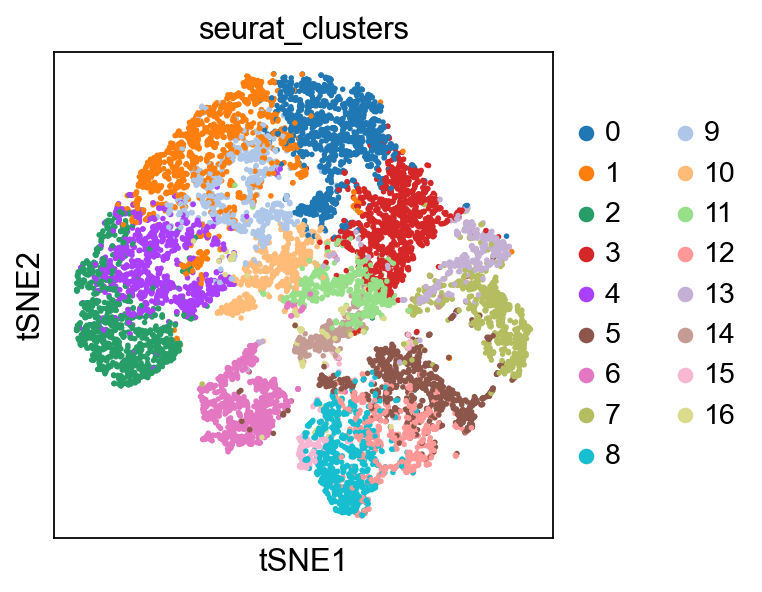

In [9]:
sc.pl.tsne(adata, color=["seurat_clusters"], s=25), save="_merged_clusters.pdf")

Map annotated cluster names

In [10]:
new_cluster_names = ['dorsal/lateral MHb', 'ventro/lateral MHb1','vMHb1', 'dMHb', 'vMHb2', 'early Hb1','LHb subtype1', 
                     'LHb subtype3', 'early Hb2', 'ventro/lateral MHb2', 'lateral MHb', 'superior MHb', 'LHb subtype2', 'HBX',
                    'iHb1 (to MHb)', 'iHb2 (to LHb)', 'PC']
adata.rename_categories('seurat_clusters', new_cluster_names)

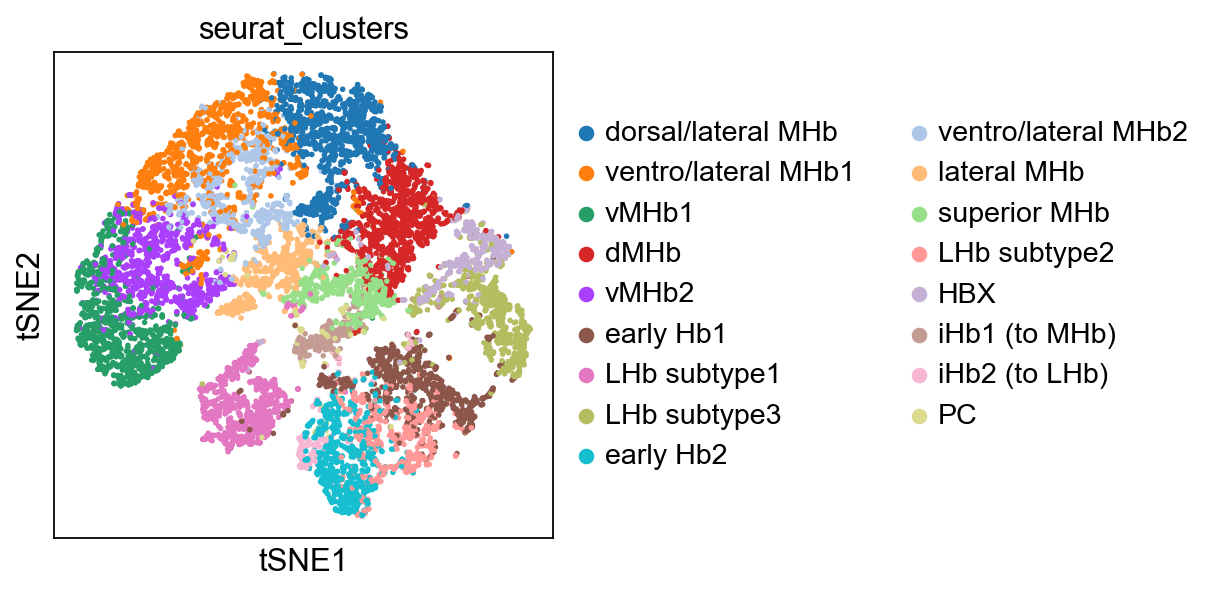

In [7]:
sc.pl.tsne(adata, color="seurat_clusters", s=25, save="_merged_annotated.pdf")

In [11]:
new_dataset_names = ['Hashikawa', 'Developmental Hb','Wallace']
adata.rename_categories('orig.ident', new_dataset_names)
adata.uns["orig.ident_colors"] = ["#7690ca", "#66c2a5", "#fc8d62"]

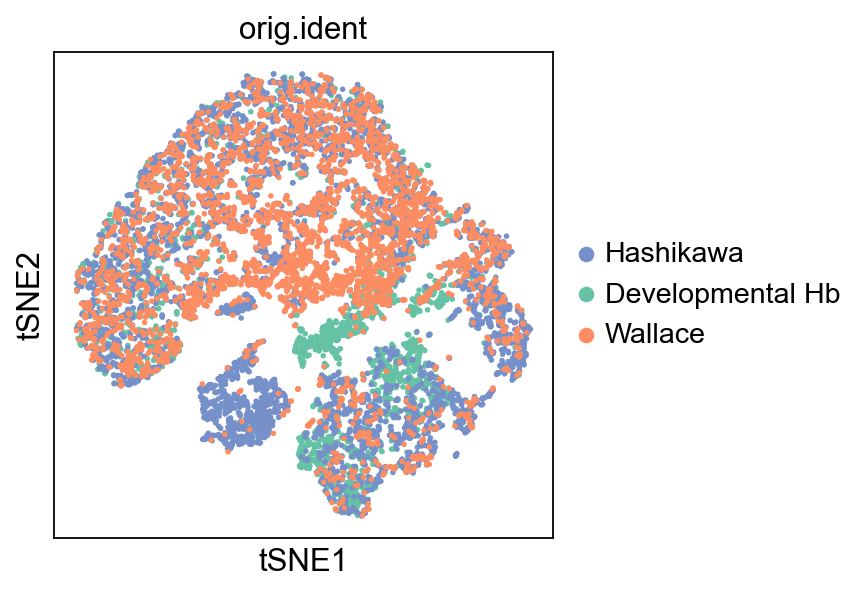

In [9]:
sc.pl.tsne(adata, color="orig.ident", s=25, save="_merged_dataset.pdf")

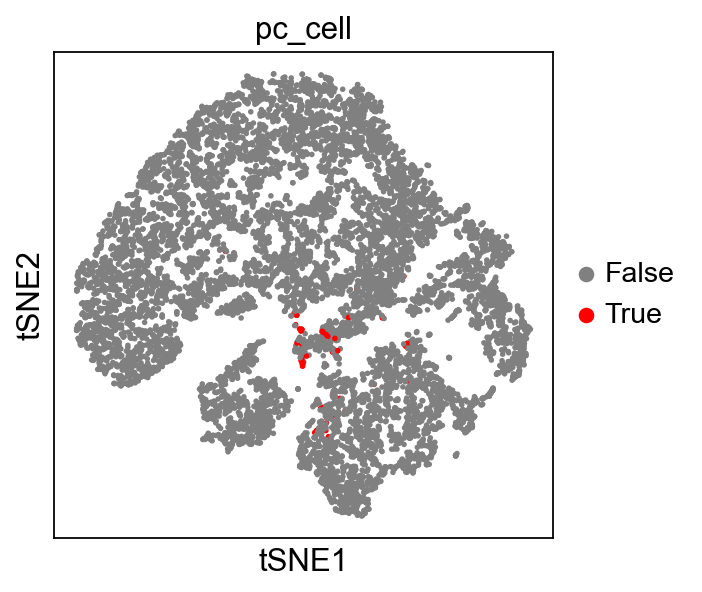

In [10]:
adata.obs['pc_cell'] = pd.Categorical(adata.obs.index.isin(pc_cells))
adata.uns['pc_cell_colors'] = ['grey', 'red']
sc.pl.tsne(adata, color='pc_cell', s=25, save="_merged_pc.pdf")

In [50]:
df = pd.DataFrame()
for x in range(0, len(set(adata.obs["seurat_clusters"]))):
    temp = adata[adata.obs["seurat_clusters"]==list(set(adata.obs["seurat_clusters"]))[x]]
    hashi = temp[temp.obs["orig.ident"] == "Hashikawa"].shape[0]
    hb = temp[temp.obs["orig.ident"] == "Developmental Hb"].shape[0]
    wallace = temp[temp.obs["orig.ident"] == "Wallace"].shape[0]
    perc_hashi = (hashi/(hb+hashi+wallace))*100
    perc_hb = (hb/(hb+hashi+wallace))*100
    perc_wal = (wallace/(hb+hashi+wallace))*100
    df[list(set(adata.obs["seurat_clusters"]))[x]] = [perc_hashi, perc_hb, perc_wal]

df.index = ["Hashikawa", "Developmental Hb", "Wallace"]

In [51]:
df

,PC,lateral MHb,dorsal/lateral MHb,superior MHb,ventro/lateral MHb1,ventro/lateral MHb2,vMHb2,LHb subtype1,vMHb1,HBX,LHb subtype3,early Hb2,iHb1 (to MHb),early Hb1,LHb subtype2,dMHb,iHb2 (to LHb)
Hashikawa,5.357143,42.361111,48.145225,10.317460,47.039474,47.119645,41.951220,96.126761,39.385727,39.835165,67.635904,42.693410,0.0,40.766551,73.505976,34.543762,0.574713
Developmental Hb,67.857143,0.173611,9.550118,16.666667,16.694079,10.044313,28.878049,0.000000,28.726287,5.494505,21.618205,46.275072,100.0,51.916376,2.988048,13.687151,99.425287
Wallace,26.785714,57.465278,42.304657,73.015873,36.266447,42.836041,29.170732,3.873239,31.887986,54.670330,10.745891,11.031519,0.0,7.317073,23.505976,51.769088,0.000000


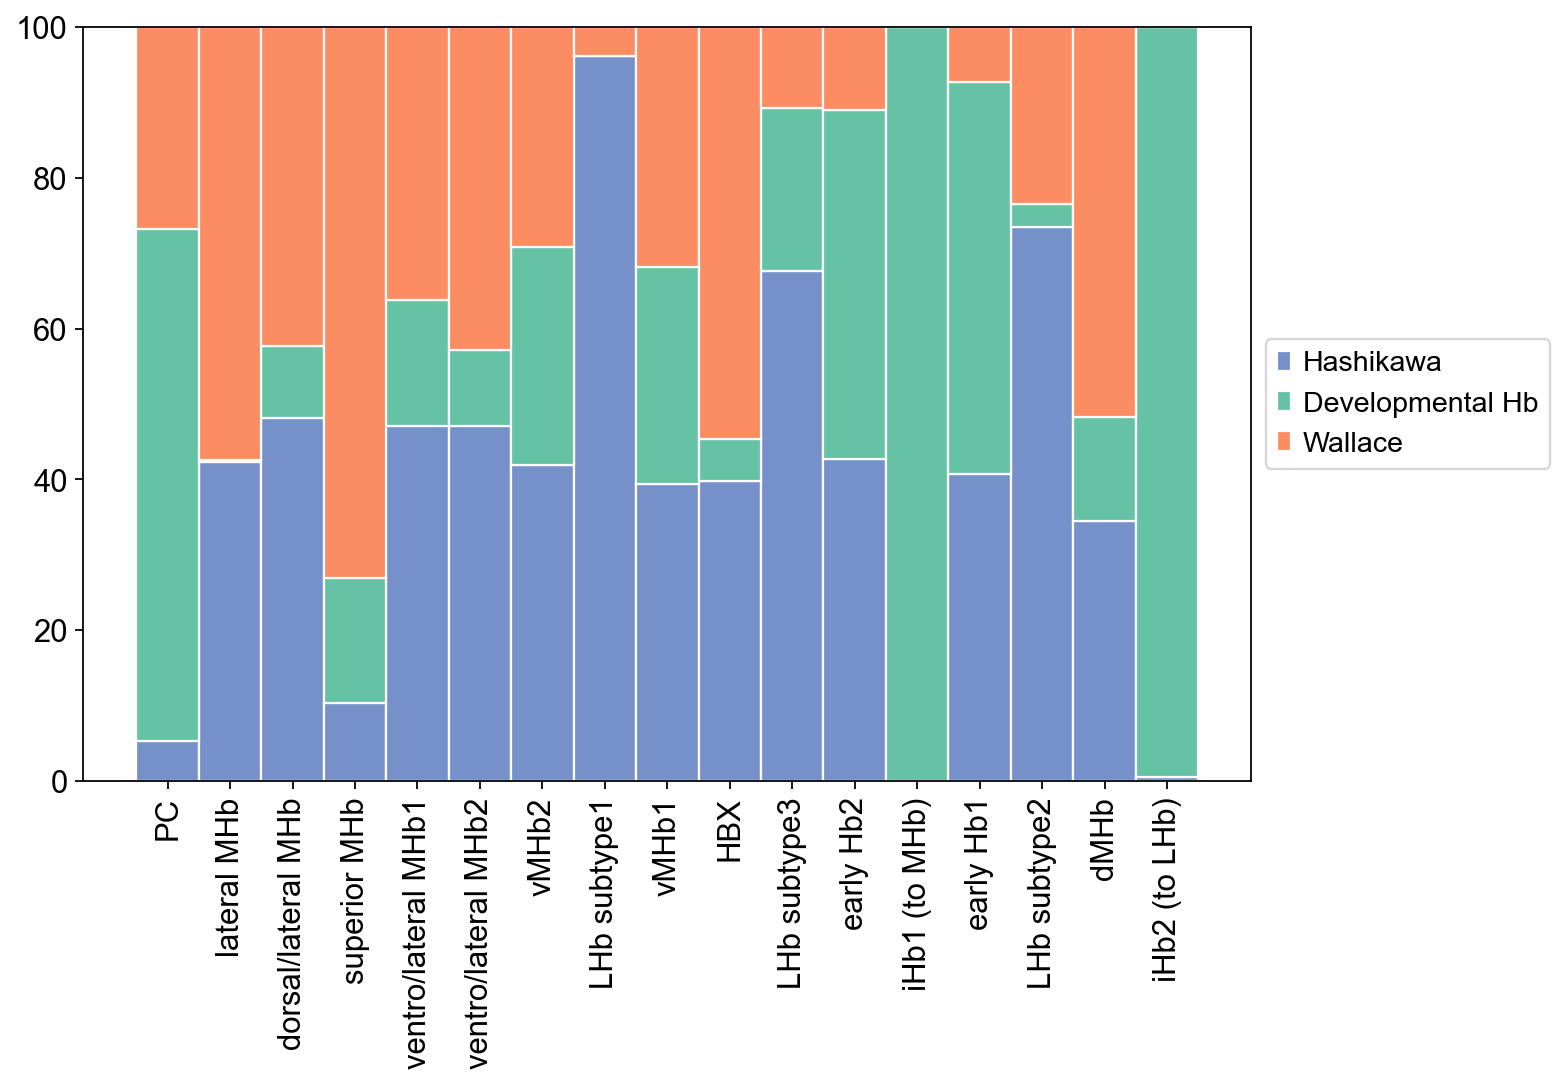

In [53]:
plt.figure(figsize=(10, 7))
een = plt.bar(df.columns, df.loc["Hashikawa"], edgecolor="white", width=1, color="#7690ca")
twee = plt.bar(df.columns, df.loc["Developmental Hb"], bottom=df.loc["Hashikawa"], edgecolor="white", width=1, color="#66c2a5")
drie = plt.bar(df.columns, df.loc["Wallace"], bottom=[i+j for i,j in zip(df.loc["Hashikawa"], df.loc["Developmental Hb"])], edgecolor="white", width=1, color="#fc8d62")
plt.legend((een[0], twee[0], drie[0]), ("Hashikawa", "Developmental Hb", "Wallace"), loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(False)
plt.savefig("../../figures/merge_adult/merged_cell_distribution_clusters.pdf")
plt.show()